In [3]:
import sys
sys.executable

'/opt/homebrew/Cellar/jupyterlab/4.1.6_1/libexec/bin/python'

In [4]:
!/opt/homebrew/Cellar/jupyterlab/4.1.6_1/libexec/bin/python -m pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 2.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 35.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 46.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 38.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 9.9 MB/s eta 0:00:00


In [5]:
!/opt/homebrew/Cellar/jupyterlab/4.1.6_1/libexec/bin/python -m pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 49.8 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 28.9 MB/s eta 0:00:00


In [6]:
!python --version

Python 3.12.2


In [6]:
import numpy as  np
import pandas as pd
from matplotlib import pyplot as plt
import glob
from scipy.special import expi
import os.path
import gzip

Matplotlib is building the font cache; this may take a moment.


In [35]:
plt.rcParams.update({'font.size':24})
plt.rcParams.update({'axes.facecolor': 'white', 'figure.facecolor': 'white'})

In [7]:
def get_lc_squared(sigma,s):
    return sigma**2/s

def u2_exact(wt):
    u2 = (-1*np.exp(wt**2/(4*np.pi**2))/(8*np.pi))*expi(-1*wt**2/(4*np.pi**2))
    return u2

def get_EPsquared_theory(mu,s,rho,sigma,w):
    lcs = get_lc_squared(sigma,s)
    u2 = u2_exact(w/np.sqrt(lcs))
    return ((2*mu/(s**2*rho*lcs))*u2+mu**2/(s**2))
    
def get_EPsquared_theory_finitehabitat(mu, s, rho, sigma, w):
    lcs = get_lc_squared(sigma, s)
    return (mu/(s**2*rho*4*np.pi*lcs))*np.exp((w/np.sqrt(lcs))**2)*exp1((w/np.sqrt(lcs))**2)+mu**2/s**2

def get_EP_theory(mu,s):
    return mu/s

def get_EPsquared_sim(ps,zeros):
    return (np.sum(ps**2)/(len(ps)+zeros))

def get_EP_sim(ps,zeros):
    return np.sum(ps)/(len(ps)+zeros)

FileNotFoundError: ../results/gaussian_w30/s0.1_mu1e-09/s0.1_mu1e-09_rho1_L10000_sigma10_time1000000.0_r0.1_burnin_wrapped_norm_gaussian_w30_nside10_all.p not found.

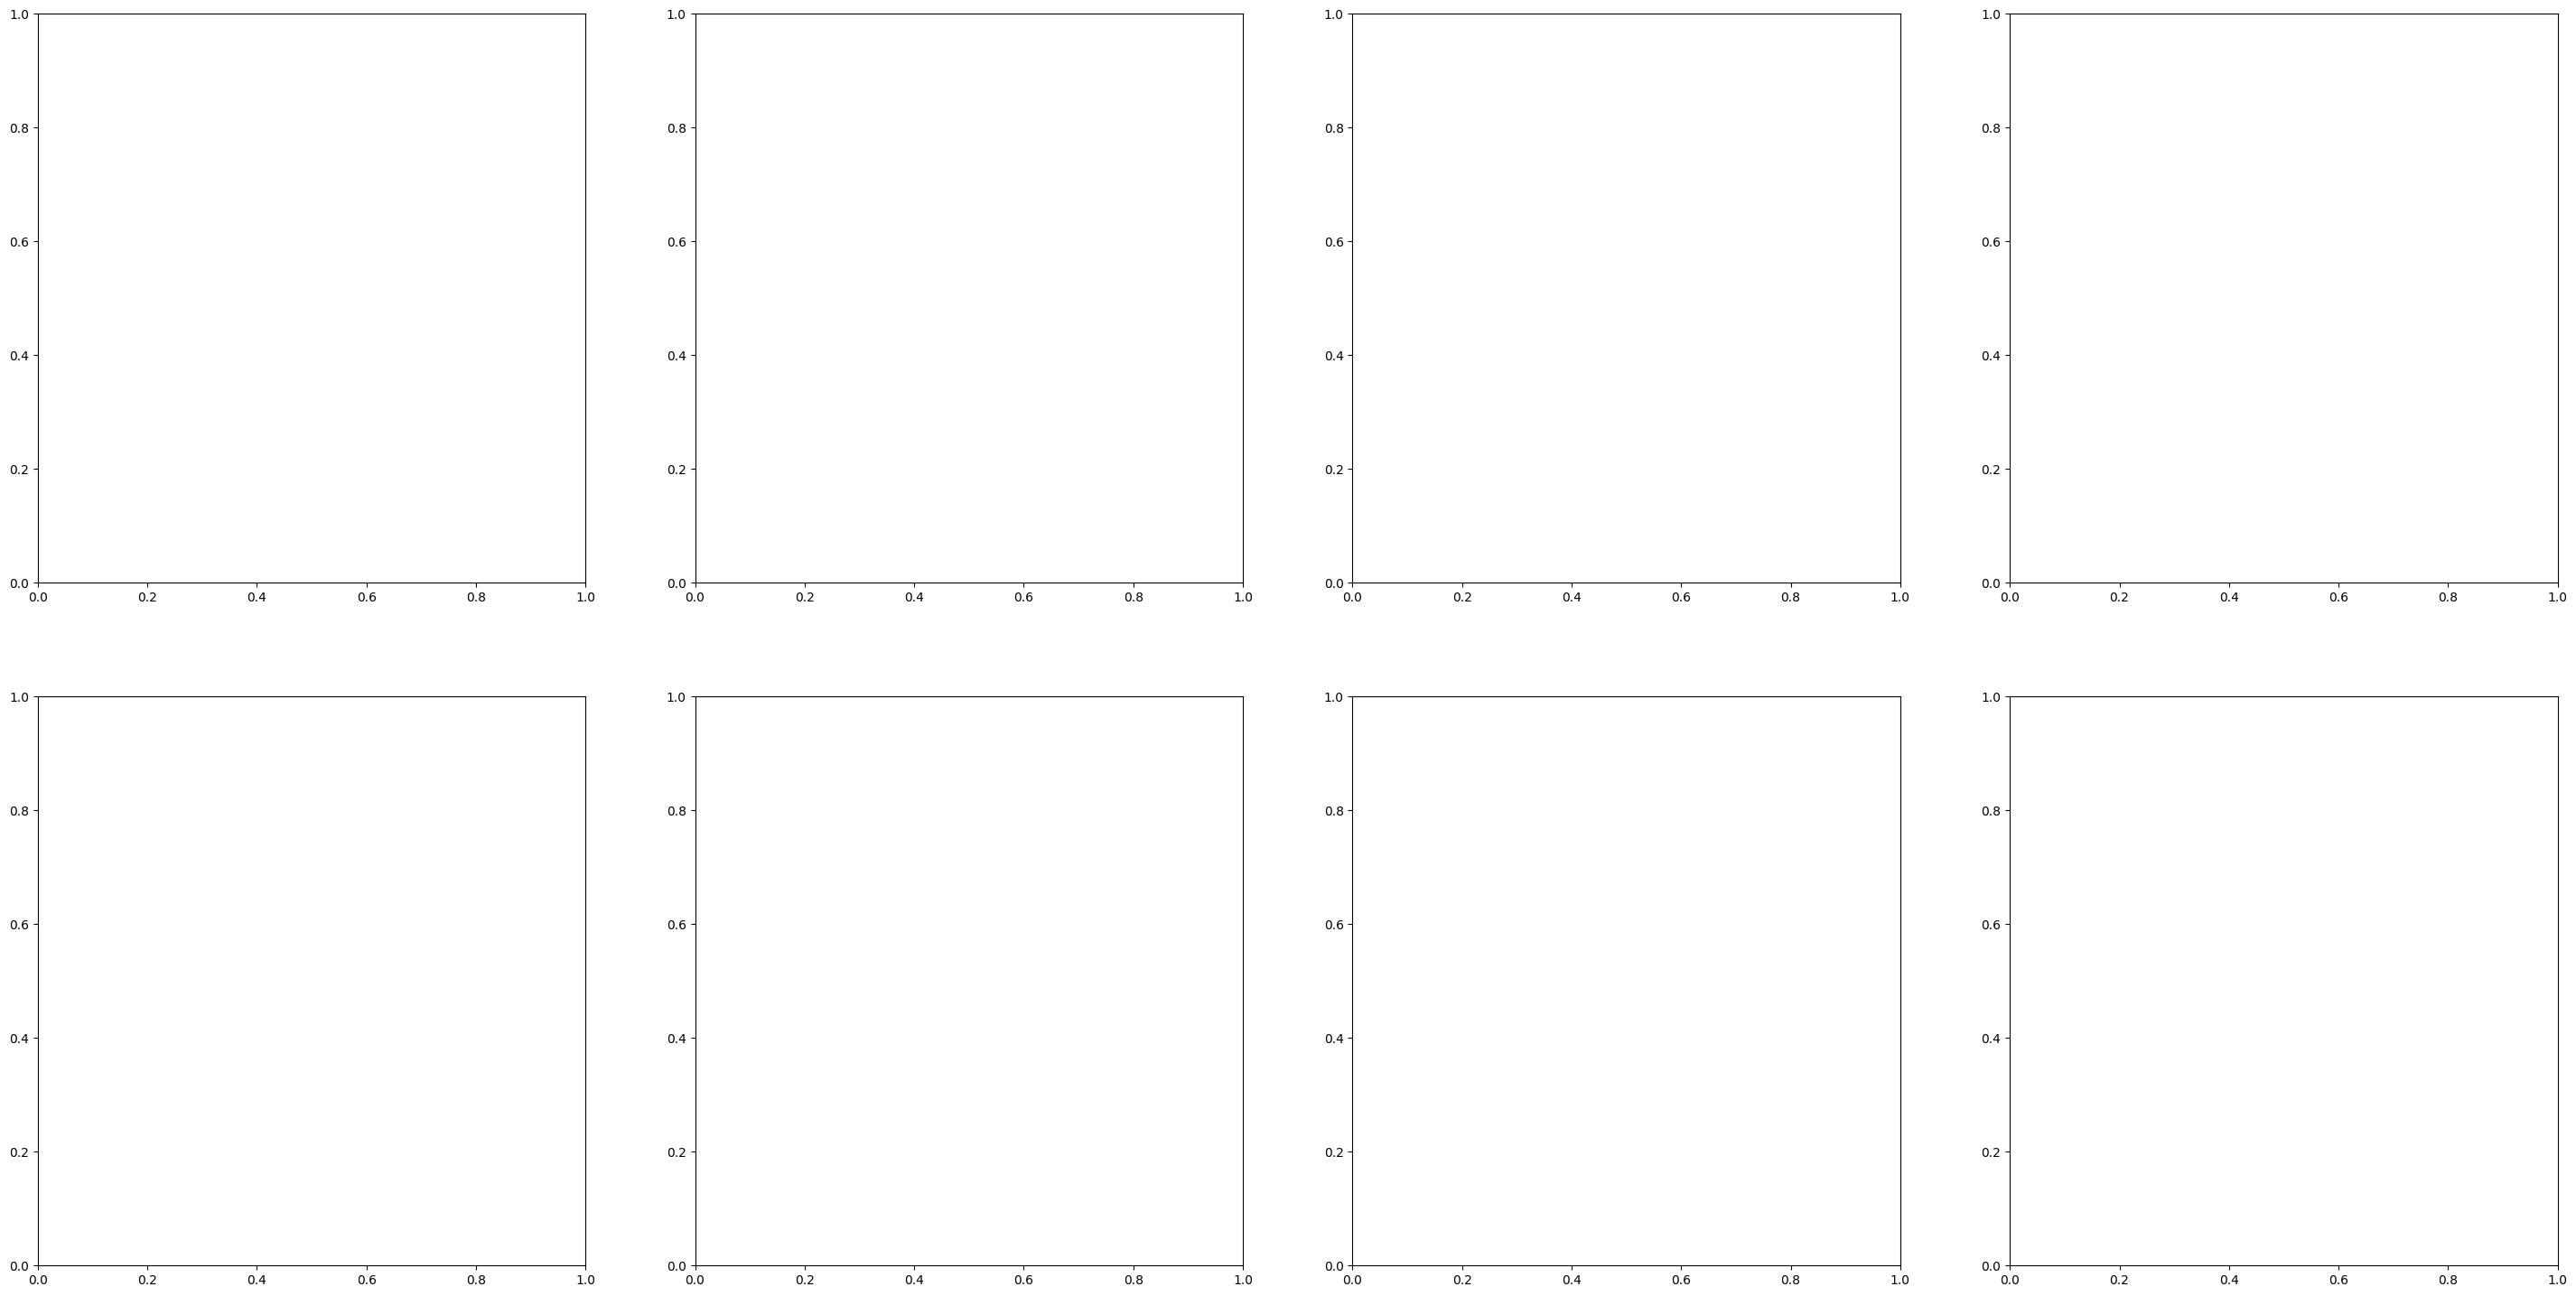

In [8]:
prefix = "../results/gaussian_w{w}/s0.1_mu1e-09/s0.1_mu1e-09_rho1_L10000_sigma{sig}_time1000000.0_r0.1_burnin_wrapped_norm_gaussian_w{w}_nside10_all"
sigma_vals = [10,30,60,100]
w_vals = [10,30,60,100,300,600,1000]#
mu = 1e-9
s = 0.1
rho = 1

fig, axs = plt.subplots(2, len(sigma_vals), figsize=(36, 18))

for i,sig in enumerate(sigma_vals):
    sim_EP = []
    sim_EPsquared = []
    sim_EPsquared_adj = []
    for w in w_vals:
        pfile = prefix.format(w=w,sig=sig)+'.p'
        zfile = prefix.format(w=w,sig=sig)+'.zero'
        ps = np.loadtxt(pfile)
        zeros = np.loadtxt(zfile)
        sim_EP.append(get_EP_sim(ps,zeros))
        sim_EPsquared.append(get_EPsquared_sim(ps,zeros))
        sim_EPsquared_adj.append(get_EPsquared_sim(ps,zeros)*(w/sig))

    theory_EP = np.repeat(get_EP_theory(mu,s),len(w_vals))
    theory_EPsquared = [get_EPsquared_theory(mu,s,rho,sig,w) for w in w_vals]
    theory_EPsquared_v2 = [get_EPsquared_theory_finitehabitat(mu,s,rho,sig,w) for w in w_vals]


    axs[0,i].scatter(w_vals,sim_EP,label="simulation",marker='x',color='red',s=300)
    axs[0,i].scatter(w_vals,theory_EP,label="theory",marker='o',color='black',s=100)
    axs[0,i].set_xlabel(r'$w$')
    axs[0,i].set_ylabel(r'$\mathbb{E}[P]$')
    axs[0,i].set_title(r'$\sigma$='+str(sig))
    axs[0,i].set_xscale('log')
    axs[0,i].set_ylim((mu/s)-1e-8,(mu/s)+1e-8)
    axs[0,i].legend()

    axs[1,i].scatter(w_vals,sim_EPsquared,label="simulation",marker='x',color='red',s=300)
    axs[1,i].scatter(w_vals,theory_EPsquared,label="theory (infinite habitat)",marker='o',color='blue',s=100)
    axs[1,i].scatter(w_vals,theory_EPsquared_v2,label="theory (finite habitat)",marker='o',color='black',s=100)
    # axs[1,i].scatter(w_vals,sim_EPsquared_adj,label="simulation (adj)",marker='+',color='blue',s=300)
    # axs[1,i].scatter(w_vals,theory_EPsquared_v2,label="theory (adj)",marker='+',color='green',s=200)
    axs[1,i].set_xlabel(r'$w$')
    axs[1,i].set_ylabel(r'$\mathbb{E}[P^2]$')
    axs[1,i].set_title(r'$\sigma$='+str(sig))
    axs[1,i].set_xscale('log')
    axs[1,i].set_yscale('log')
    axs[1,i].set_ylim()
    axs[1,i].axvline(x=sig, color='black', linestyle='--')

    # axs[1,i].legend()

plt.suptitle("s="+str(s)+", rho="+str(rho)+", L=10000, mu=1e-09") 
plt.tight_layout()
plt.show()
# plt.savefig("sim_comparison_20240502.png")

[0.002486528393426642, 0.0005799397729842658, 0.000192615230710533, 7.938983868167148e-05, 8.603625122953702e-06, 2.198893692662935e-06, 8.041869643697956e-07]
[0.002486528393426642, 0.0017398387700818816, 0.0011557425618928638, 0.0007939895003800055, 0.00025839613751510356, 0.00013251836850510044, 8.141379473211425e-05]
[0.004310998077165366, 0.002626827459223475, 0.0016622189182089228, 0.0010601108537284635, 0.00025977428802305126, 7.930524189462744e-05, 3.0263541318594077e-05]
[0.001298413171746472, 0.00031564741085681364, 0.00013650476339907116, 5.975741761584794e-05, 8.532401817718829e-06, 2.176405856268316e-06, 7.969731913736921e-07]
[0.0004327982686701754, 0.00031564741085681364, 0.0002730197287508582, 0.00019921427012820645, 8.541429137320286e-05, 4.371958908675023e-05, 2.6891272940360336e-05]
[0.0006720554864226837, 0.0004789997863517073, 0.0003595066246264457, 0.0002747511848721136, 0.00011779009485871818, 5.226169831472893e-05, 2.440611323401026e-05]
[0.0009462468946227062, 

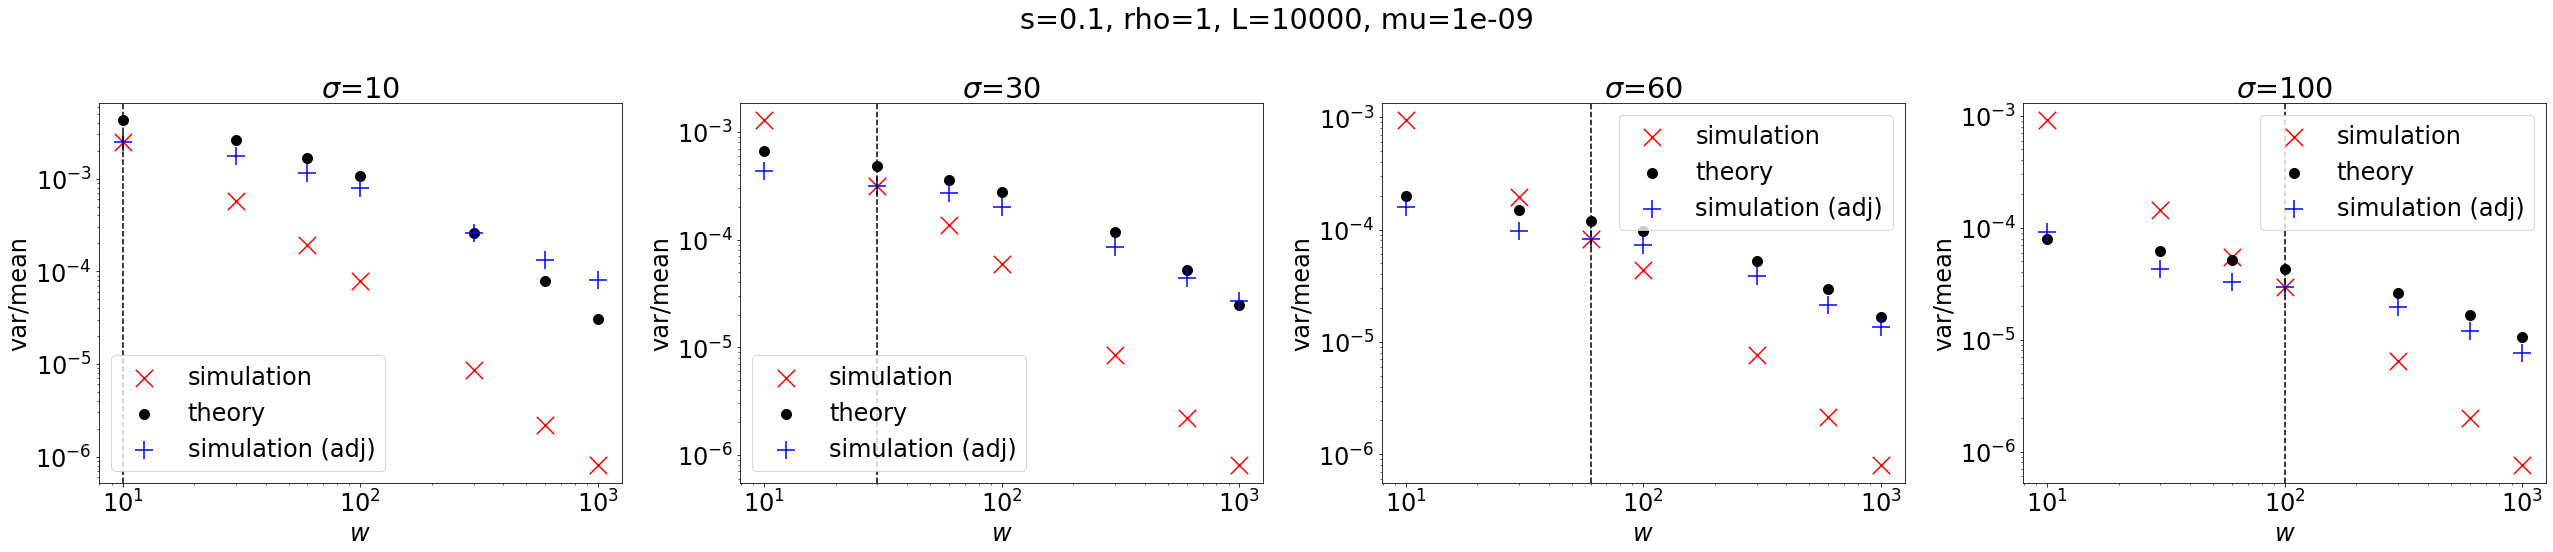

In [46]:
prefix = "../results/gaussian_w{w}/s0.1_mu1e-09/s0.1_mu1e-09_rho1_L10000_sigma{sig}_time1000000.0_r0.1_burnin_wrapped_norm_gaussian_w{w}_nside10_all"
sigma_vals = [10,30,60,100]
w_vals = [10,30,60,100,300,600,1000]#
mu = 1e-9
s = 0.1
rho = 1

fig, axs = plt.subplots(1, len(sigma_vals), figsize=(36, 8))

for i,sig in enumerate(sigma_vals):
    sim_ratio = []
    sim_ratio_adj = []
    for w in w_vals:
        pfile = prefix.format(w=w,sig=sig)+'.p'
        zfile = prefix.format(w=w,sig=sig)+'.zero'
        ps = np.loadtxt(pfile)
        zeros = np.loadtxt(zfile)
        sim_EP = get_EP_sim(ps,zeros)
        sim_EPsquared = get_EPsquared_sim(ps,zeros)
        sim_EPsquared_adj = get_EPsquared_sim(ps,zeros)*(w/sig)
        sim_ratio.append((sim_EPsquared-sim_EP**2)/sim_EP)
        sim_ratio_adj.append((sim_EPsquared_adj-sim_EP**2)/sim_EP)

    lcs = get_lc_squared(sig,s)
    theory_ratio = [(2/(s*rho*lcs))*u2_exact(w/np.sqrt(lcs)) for w in w_vals]

    print(sim_ratio)
    print(sim_ratio_adj)
    print(theory_ratio)
    

    axs[i].scatter(w_vals,sim_ratio,label="simulation",marker='x',color='red',s=300)
    axs[i].scatter(w_vals,theory_ratio,label="theory",marker='o',color='black',s=100)
    axs[i].scatter(w_vals,sim_ratio_adj,label="simulation (adj)",marker='+',color='blue',s=300)
    axs[i].set_xlabel(r'$w$')
    axs[i].set_ylabel("var/mean")
    axs[i].set_title(r'$\sigma$='+str(sig))
    axs[i].set_xscale('log')
    axs[i].set_yscale('log')
    axs[i].legend()
    axs[i].axvline(x=sig, color='black', linestyle='--')

    # axs[1,i].scatter(w_vals,sim_EPsquared,label="simulation",marker='x',color='red',s=300)
    # axs[1,i].scatter(w_vals,theory_EPsquared,label="theory",marker='o',color='black',s=100)
    # axs[1,i].scatter(w_vals,sim_EPsquared_adj,label="simulation (adj)",marker='+',color='blue',s=300)
    # # axs[1,i].scatter(w_vals,theory_EPsquared_v2,label="theory (adj)",marker='+',color='green',s=200)
    # axs[1,i].set_xlabel(r'$w$')
    # axs[1,i].set_ylabel(r'$\mathbb{E}[P^2]$')
    # axs[1,i].set_title(r'$\sigma$='+str(sig))
    # axs[1,i].set_xscale('log')
    # axs[1,i].set_yscale('log')
    # axs[1,i].set_ylim()
    # axs[1,i].axvline(x=sig, color='black', linestyle='--')

    # axs[1,i].legend()

plt.suptitle("s="+str(s)+", rho="+str(rho)+", L=10000, mu=1e-09") 
plt.tight_layout()
# plt.show()
plt.savefig("sim_comparison_varmeanratio_20240502.png")

[4.311008077165365e-11, 2.626837459223475e-11, 1.6622289182089226e-11, 1.0601208537284634e-11, 2.5978428802305124e-12, 7.931524189462742e-13, 3.0273541318594074e-13]
[2.2664100916617084e-11, 5.640336279245537e-12, 1.9716229550579543e-12, 8.038237222663174e-13, 8.535829731322875e-14, 2.1891386042185295e-14, 8.184316218871434e-15]
[6.720654864226836e-12, 4.790097863517073e-12, 3.595166246264457e-12, 2.7476118487211357e-12, 1.1780009485871815e-12, 5.227169831472892e-13, 2.4416113234010256e-13]
[1.1923241055474197e-11, 3.232466235179532e-12, 1.392719221532795e-12, 5.86011009310593e-13, 8.568362821992499e-14, 2.2034223754214688e-14, 8.124479366000531e-15]
[1.986297336573545e-12, 1.5015392231942018e-12, 1.197599465879268e-12, 9.765750870725815e-13, 5.286982095801451e-13, 2.945752371467954e-13, 1.6593959282782735e-13]
[9.627610764827153e-12, 1.969270829002976e-12, 8.21012372992155e-13, 4.3687905053852483e-13, 7.60688243467518e-14, 2.1283181840580277e-14, 8.106973836578587e-15]
[7.963977418343

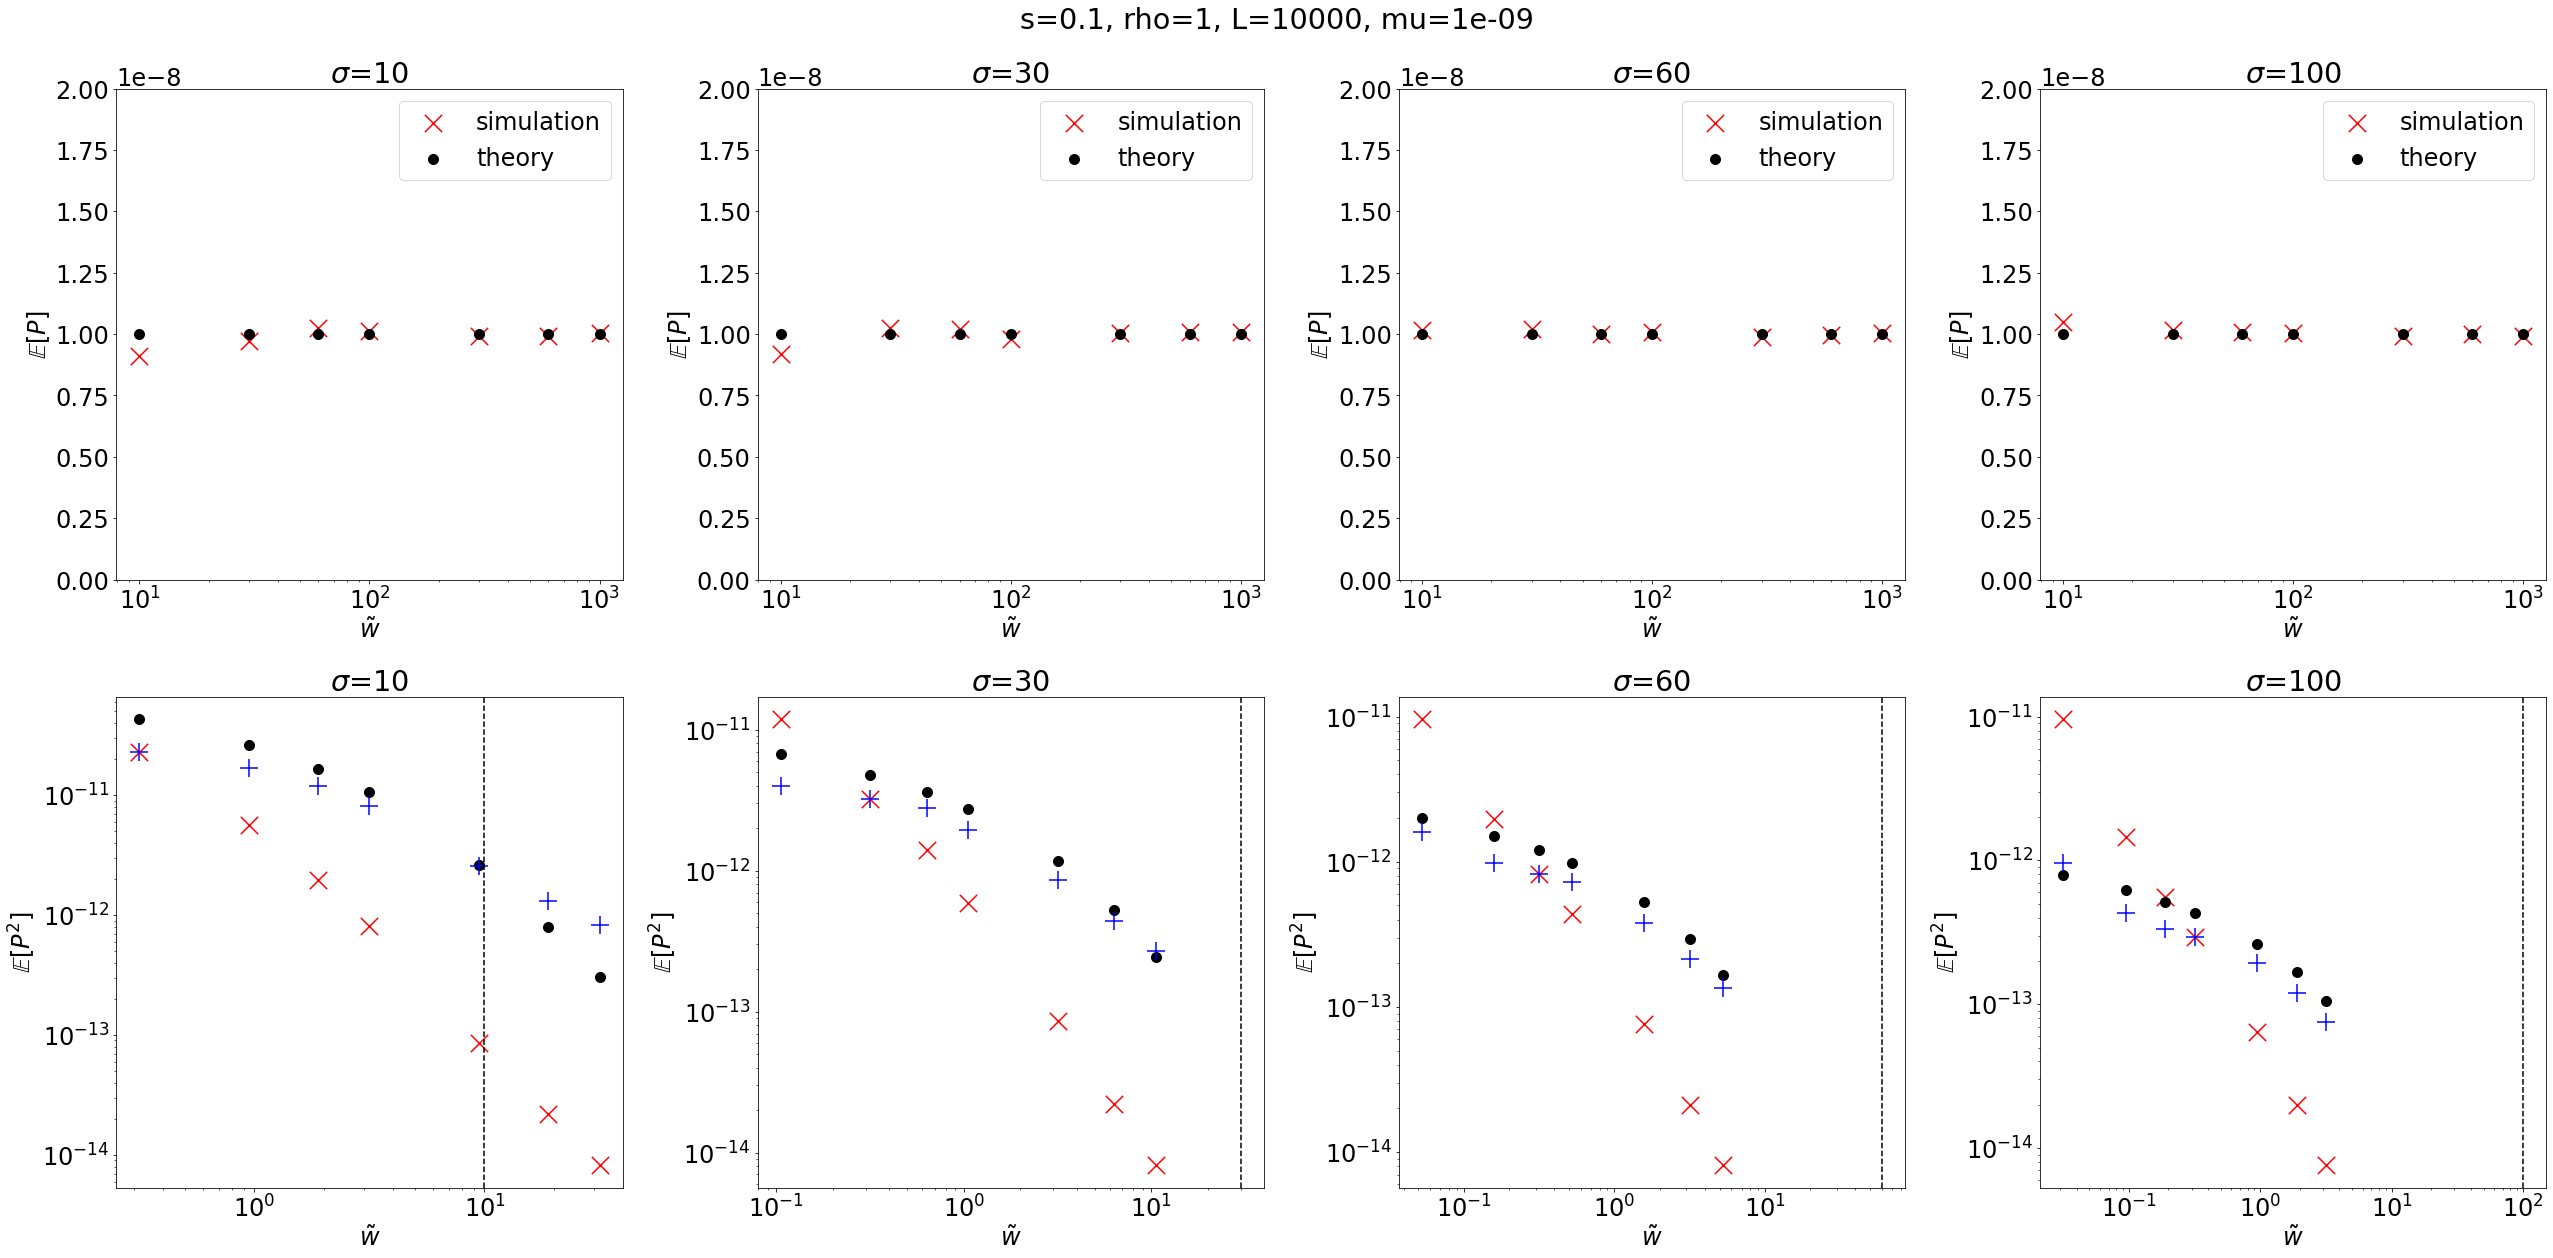

In [45]:
prefix = "../results/gaussian_w{w}/s0.1_mu1e-09/s0.1_mu1e-09_rho1_L10000_sigma{sig}_time1000000.0_r0.1_burnin_wrapped_norm_gaussian_w{w}_nside10_all"
sigma_vals = [10,30,60,100]
w_vals = [10,30,60,100,300,600,1000]#
mu = 1e-9
s = 0.1
rho = 1

fig, axs = plt.subplots(2, len(sigma_vals), figsize=(36, 18))

for i,sig in enumerate(sigma_vals):
    sim_EP = []
    sim_EPsquared = []
    sim_EPsquared_adj = []
    for w in w_vals:
        pfile = prefix.format(w=w,sig=sig)+'.p'
        zfile = prefix.format(w=w,sig=sig)+'.zero'
        ps = np.loadtxt(pfile)
        zeros = np.loadtxt(zfile)
        sim_EP.append(get_EP_sim(ps,zeros))
        sim_EPsquared.append(get_EPsquared_sim(ps,zeros))
        sim_EPsquared_adj.append(get_EPsquared_sim(ps,zeros)*(w/sig))

    theory_EP = np.repeat(get_EP_theory(mu,s),len(w_vals))
    theory_EPsquared = [get_EPsquared_theory(mu,s,rho,sig,w) for w in w_vals]
    theory_EPsquared_v2 = [get_EPsquared_theory_v2(mu,s,rho,sig,w) for w in w_vals]
    lc = np.sqrt(get_lc_squared(sig,s))
    w_tilde_vals = [w/lc for w in w_vals]
    
    print(theory_EPsquared)
    print(sim_EPsquared)

    axs[0,i].scatter(w_vals,sim_EP,label="simulation",marker='x',color='red',s=300)
    axs[0,i].scatter(w_vals,theory_EP,label="theory",marker='o',color='black',s=100)
    axs[0,i].set_xlabel(r'$\tilde{w}$')
    axs[0,i].set_ylabel(r'$\mathbb{E}[P]$')
    axs[0,i].set_title(r'$\sigma$='+str(sig))
    axs[0,i].set_xscale('log')
    axs[0,i].set_ylim((mu/s)-1e-8,(mu/s)+1e-8)
    axs[0,i].legend()

    axs[1,i].scatter(w_tilde_vals,sim_EPsquared,label="simulation",marker='x',color='red',s=300)
    axs[1,i].scatter(w_tilde_vals,theory_EPsquared,label="theory",marker='o',color='black',s=100)
    axs[1,i].scatter(w_tilde_vals,sim_EPsquared_adj,label="simulation (adj)",marker='+',color='blue',s=300)
    # axs[1,i].scatter(w_vals,theory_EPsquared_v2,label="theory (adj)",marker='+',color='green',s=200)
    axs[1,i].set_xlabel(r'$\tilde{w}$')
    axs[1,i].set_ylabel(r'$\mathbb{E}[P^2]$')
    axs[1,i].set_title(r'$\sigma$='+str(sig))
    axs[1,i].set_xscale('log')
    axs[1,i].set_yscale('log')
    axs[1,i].set_ylim()
    axs[1,i].axvline(x=sig, color='black', linestyle='--')

    # axs[1,i].legend()

plt.suptitle("s="+str(s)+", rho="+str(rho)+", L=10000, mu=1e-09") 
plt.tight_layout()
# plt.show()
plt.savefig("sim_comparison_wtilde_20240502.png")

In [129]:
# prefix = "../results/gaussian_w{w}/s0.01_mu1e-09/s0.01_mu1e-09_rho1_L10000_sigma{sig}_time1000000.0_r0.1_burnin_wrapped_norm_gaussian_w{w}_nside10_all"
# sigma_vals = [10,100]
# w_vals = [10,100,1000]
# mu = 1e-9
# s = 0.01
# rho = 1

# fig, axs = plt.subplots(3, len(sigma_vals), figsize=(12, 15))

# for i,sig in enumerate(sigma_vals):
#     sim_EP = []
#     sim_EPsquared = []
#     sim_EPsquared_adj = []
#     u2s = []
#     sim_u2s = []
#     # u2s_noscale = []
#     lcs = get_lc_squared(sig,s)
#     u2s_v2 = []
#     het_sim = []
#     het_sim_adj = []
#     # het_theory = []
#     for w in w_vals:
#         pfile = prefix.format(w=w,sig=sig)+'.p'
#         zfile = prefix.format(w=w,sig=sig)+'.zero'
#         ps = np.loadtxt(pfile)
#         zeros = np.loadtxt(zfile)
#         sim_EP.append(get_EP_sim(ps,zeros))
#         sim_EPsquared.append(get_EPsquared_sim(ps,zeros))
#         sim_EPsquared_adj.append(get_EPsquared_sim_adj(ps,zeros,sig,w))
#         het_sim.append(get_het_sim(ps,zeros,sig,w))

#     theory_EP = np.repeat(get_EP_theory(mu,s),len(w_vals))
#     theory_EPsquared = [get_EPsquared_theory(mu,s,rho,sig,w) for w in w_vals]
#     het_theory = [2*get_EP_theory(mu,s)-2*get_EPsquared_theory(mu,s,rho,sig,w) for w in w_vals]

#     print(theory_EPsquared)
#     print(sim_EPsquared)

#     axs[0,i].scatter(w_vals,sim_EP,label="simulation",marker='x',color='red',s=200)
#     axs[0,i].scatter(w_vals,theory_EP,label="theory",marker='o',color='black')
#     axs[0,i].set_xlabel(r'$w$')
#     axs[0,i].set_ylabel(r'$\mathbb{E}[P]$')
#     axs[0,i].set_title(r'$\sigma$='+str(sig))
#     axs[0,i].set_xscale('log')
#     # axs[0,i].set_yscale('log')
#     axs[0,i].set_ylim((mu/s)-1e-7,(mu/s)+1e-7)
#     axs[0,i].legend()

#     axs[1,i].scatter(w_vals,sim_EPsquared,label="simulation",marker='x',color='red',s=200)
#     # axs[1,i].scatter(w_vals,sim_EPsquared_adj,label="simulation adj",marker='x',color='blue',s=200)
#     axs[1,i].scatter(w_vals,theory_EPsquared,label="theory",marker='o',color='black')
#     axs[1,i].set_xlabel(r'$w$')
#     axs[1,i].set_ylabel(r'$\mathbb{E}[P^2]$')
#     axs[1,i].set_title(r'$\sigma$='+str(sig))
#     axs[1,i].set_xscale('log')
#     axs[1,i].set_yscale('log')
#     # axs[0,i].set_ylim((mu/s)-1e-8,(mu/s)+1e-8)
#     axs[1,i].legend()

#     axs[2,i].scatter(w_vals,het_sim,label="simulation",marker='x',color='red',s=200)
#     # axs[2,i].scatter(w_vals,het_sim_adj,label="simulation adj",marker='x',color='blue',s=200)
#     axs[2,i].scatter(w_vals,het_theory,label="theory",marker='o',color='black')
#     axs[2,i].set_xlabel(r'$w$')
#     axs[2,i].set_ylabel('heterozygosity')
#     axs[2,i].set_title(r'$\sigma$='+str(sig))
#     axs[2,i].set_xscale('log')
#     # axs[2,i].set_yscale('log')
#     axs[2,i].set_ylim(1.7e-7,2.3e-7)
#     axs[2,i].legend()

# plt.tight_layout()
# plt.show()


In [130]:
# prefix = "../results/gaussian_w{w}/s0.1_mu1e-09/s0.1_mu1e-09_rho1_L1000_sigma{sig}_time1000000.0_r0.1_burnin_wrapped_norm_gaussian_w{w}_nside10_all"
# sigma_vals = [10,100]
# w_vals = [10,100,1000]
# mu = 1e-9
# s = 0.1
# rho = 1

# fig, axs = plt.subplots(3, len(sigma_vals), figsize=(12, 15))

# for i,sig in enumerate(sigma_vals):
#     sim_EP = []
#     sim_EPsquared = []
#     sim_EPsquared_adj = []
#     u2s = []
#     sim_u2s = []
#     # u2s_noscale = []
#     lcs = get_lc_squared(sig,s)
#     u2s_v2 = []
#     het_sim = []
#     het_sim_adj = []
#     # het_theory = []
#     for w in w_vals:
#         pfile = prefix.format(w=w,sig=sig)+'.p'
#         zfile = prefix.format(w=w,sig=sig)+'.zero'
#         ps = np.loadtxt(pfile)
#         zeros = np.loadtxt(zfile)
#         sim_EP.append(get_EP_sim(ps,zeros))
#         sim_EPsquared.append(get_EPsquared_sim(ps,zeros))
#         sim_EPsquared_adj.append(get_EPsquared_sim_adj(ps,zeros,sig,w))
#         het_sim.append(get_het_sim(ps,zeros,sig,w))

#     theory_EP = np.repeat(get_EP_theory(mu,s),len(w_vals))
#     theory_EPsquared = [get_EPsquared_theory(mu,s,rho,sig,w) for w in w_vals]
#     het_theory = [2*get_EP_theory(mu,s)-2*get_EPsquared_theory(mu,s,rho,sig,w) for w in w_vals]

#     print(theory_EPsquared)
#     print(sim_EPsquared)

#     axs[0,i].scatter(w_vals,sim_EP,label="simulation",marker='x',color='red',s=200)
#     axs[0,i].scatter(w_vals,theory_EP,label="theory",marker='o',color='black')
#     axs[0,i].set_xlabel(r'$w$')
#     axs[0,i].set_ylabel(r'$\mathbb{E}[P]$')
#     axs[0,i].set_title(r'$\sigma$='+str(sig))
#     axs[0,i].set_xscale('log')
#     # axs[0,i].set_yscale('log')
#     axs[0,i].set_ylim((mu/s)-1e-8,(mu/s)+1e-8)
#     axs[0,i].legend()

#     axs[1,i].scatter(w_vals,sim_EPsquared,label="simulation",marker='x',color='red',s=200)
#     # axs[1,i].scatter(w_vals,sim_EPsquared_adj,label="simulation adj",marker='x',color='blue',s=200)
#     axs[1,i].scatter(w_vals,theory_EPsquared,label="theory",marker='o',color='black')
#     axs[1,i].set_xlabel(r'$w$')
#     axs[1,i].set_ylabel(r'$\mathbb{E}[P^2]$')
#     axs[1,i].set_title(r'$\sigma$='+str(sig))
#     axs[1,i].set_xscale('log')
#     axs[1,i].set_yscale('log')
#     # axs[0,i].set_ylim((mu/s)-1e-8,(mu/s)+1e-8)
#     axs[1,i].legend()

#     axs[2,i].scatter(w_vals,het_sim,label="simulation",marker='x',color='red',s=200)
#     # axs[2,i].scatter(w_vals,het_sim_adj,label="simulation adj",marker='x',color='blue',s=200)
#     axs[2,i].scatter(w_vals,het_theory,label="theory",marker='o',color='black')
#     axs[2,i].set_xlabel(r'$w$')
#     axs[2,i].set_ylabel('heterozygosity')
#     axs[2,i].set_title(r'$\sigma$='+str(sig))
#     axs[2,i].set_xscale('log')
#     # axs[2,i].set_yscale('log')
#     # axs[2,i].set_ylim(1.7e-8,2.3e-8)
#     axs[2,i].legend()

# plt.tight_layout()
# plt.show()


[2.2664100916617084e-11, 1.1923241055474197e-11, 9.627610764827153e-12, 9.630152483817144e-12]
[5.640336279245537e-12, 3.232466235179532e-12, 1.969270829002976e-12, 1.4473692635166279e-12]
[1.9716229550579543e-12, 1.392719221532795e-12, 8.21012372992155e-13, 5.540213439633647e-13]
[8.038237222663174e-13, 5.86011009310593e-13, 4.3687905053852483e-13, 2.946553305428741e-13]
[8.535829731322875e-14, 8.568362821992499e-14, 7.60688243467518e-14, 6.419972686432549e-14]
[2.1891386042185295e-14, 2.2034223754214688e-14, 2.1283181840580277e-14, 2.0037265117697898e-14]
[8.184316218871434e-15, 8.124479366000531e-15, 8.106973836578587e-15, 7.580951312298043e-15]


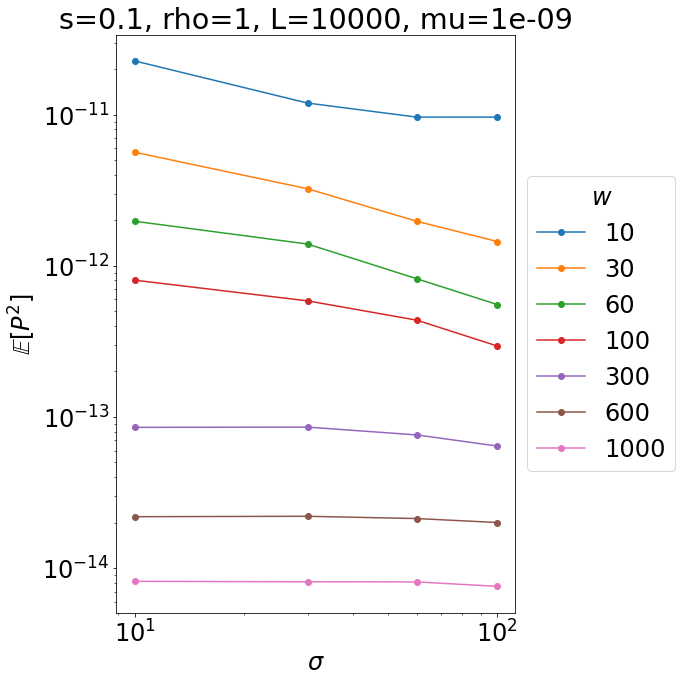

In [60]:
prefix = "../results/gaussian_w{w}/s0.1_mu1e-09/s0.1_mu1e-09_rho1_L10000_sigma{sig}_time1000000.0_r0.1_burnin_wrapped_norm_gaussian_w{w}_nside10_all"
sigma_vals = [10,30,60,100]
w_vals = [10,30,60,100,300,600,1000]#
mu = 1e-9
s = 0.1
rho = 1

fig, axs = plt.subplots(1,1, figsize=(10, 10))

for w in w_vals:
    sim_EPsquared = []
    for sig in sigma_vals:
        pfile = prefix.format(w=w,sig=sig)+'.p'
        zfile = prefix.format(w=w,sig=sig)+'.zero'
        ps = np.loadtxt(pfile)
        zeros = np.loadtxt(zfile)
        sim_EPsquared.append(get_EPsquared_sim(ps,zeros))
    print(sim_EPsquared)
    axs.plot(sigma_vals,sim_EPsquared,label=str(w),marker='o')
axs.set_xlabel(r'$\sigma$')
axs.set_ylabel(r'$\mathbb{E}[P^2]$')
axs.set_xscale('log')
axs.set_yscale('log')
axs.set_ylim()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),title=r"$w$")
# fig.legend(title='sampling width',loc=1)
    # axs.axvline(x=sig, color='black', linestyle='--')

    # axs[1,i].legend()

axs.set_title("s="+str(s)+", rho="+str(rho)+", L=10000, mu=1e-09") 
plt.tight_layout()
# plt.show()
plt.savefig("sim_comparison_oversigma_20240503.png")